### Team Features Constraint
#### Your choice of algorithm
#### Limited to a maximum of 20 features
#### Your choice of samples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
large_train = pd.read_csv('./data/large_train_sample.csv')
large_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [3]:
cheap_train = pd.read_csv('./data/cheap_train_sample.csv')
cheap_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [4]:
large_train.shape

(32561, 14)

In [5]:
cheap_train.shape

(6513, 14)

In [6]:
#lets combine our dataframes

full_train = pd.concat([large_train,cheap_train], ignore_index = True)
full_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [7]:
full_train.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
39069,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,<=50K
39070,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,<=50K
39071,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,>50K
39072,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,<=50K
39073,40,Private,223277,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Male,0,0,50,United-States,>50K


In [8]:
full_train['fnlwgt'].nunique()

21648

In [9]:
#dir(full_train)  doing dir() on your object shows all the thigns you cna do it like as if your pressing tab

In [10]:
full_train['wage'].value_counts()


 <=50K    29665
 >50K      9409
Name: wage, dtype: int64

In [11]:
full_train['wage'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
#change our target variable wage into binary!
full_train['wage'].map({' <=50K': 0, ' >50K': 1})

0        0
1        0
2        0
3        0
4        0
        ..
39069    0
39070    0
39071    1
39072    0
39073    1
Name: wage, Length: 39074, dtype: int64

In [13]:
full_train['wage'] = full_train['wage'].map({' <=50K': 0, ' >50K': 1})

In [14]:
# for x in full_train.columns:
#     print(x ,full_train[x].unique())

In [15]:
#change sex into binary
#full_train['sex'].map({' Female': 0, ''})

In [16]:
# we are looking to see how these are in a correlation matrix

#one hot encoding
full_train['Female'] =  full_train['sex'].map({' Female':1, ' Male':0 })

In [17]:
full_train['Male'] = full_train['sex'].map({' Female':0, ' Male':1 })

In [18]:
#lets strip out our whitespaces in our dataframe
for x in full_train:
    if full_train[x].dtype == 'object':
        full_train[x] = full_train[x].str.strip()

In [19]:
#how many  '?' we go


In [20]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39074 entries, 0 to 39073
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39074 non-null  int64 
 1   workclass       39074 non-null  object
 2   fnlwgt          39074 non-null  int64 
 3   education       39074 non-null  object
 4   education-num   39074 non-null  int64 
 5   marital-status  39074 non-null  object
 6   occupation      39074 non-null  object
 7   relationship    39074 non-null  object
 8   sex             39074 non-null  object
 9   capital-gain    39074 non-null  int64 
 10  capital-loss    39074 non-null  int64 
 11  hours-per-week  39074 non-null  int64 
 12  native-country  39074 non-null  object
 13  wage            39074 non-null  int64 
 14  Female          39074 non-null  int64 
 15  Male            39074 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 4.8+ MB


In [21]:
objects = full_train.select_dtypes(include='object').columns.to_list()

In [22]:
objects

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'native-country']

In [23]:
full_train.shape

(39074, 16)

In [24]:
full_train.index

RangeIndex(start=0, stop=39074, step=1)

In [25]:
dummies = pd.get_dummies(full_train[objects])

In [26]:
full_train_dum = full_train.join(dummies)

In [27]:
full_train_dum

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39069,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,...,0,0,0,0,0,0,0,1,0,0
39070,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,...,0,0,0,0,0,0,0,1,0,0
39071,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,...,0,0,0,0,0,0,0,1,0,0
39072,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,...,0,0,0,0,0,0,0,1,0,0


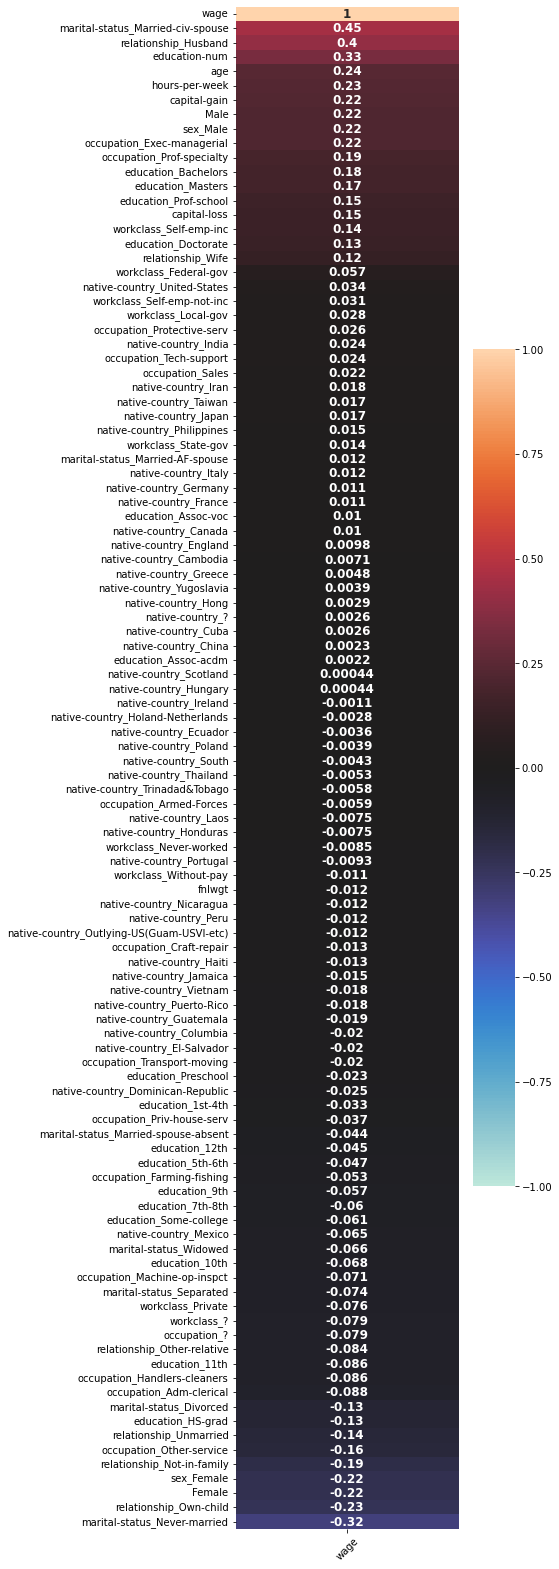

In [28]:
plt.figure(figsize= (5,28))

corr = full_train_dum.corr()

sns.heatmap(corr[['wage']].sort_values(by='wage', ascending = False), annot=True, vmin=-1, vmax=1, cmap='icefire', annot_kws = {'size':12,'weight':'bold'})
plt.xticks(rotation=45);

In [29]:
full_train.ha

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39069,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,0,1,0
39070,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,0,0,1
39071,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,1,0,1
39072,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,0,1,0


In [42]:
objects

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'native-country']

In [41]:
return_list

[]

In [38]:
full_train.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage', 'Female',
       'Male'],
      dtype='object')

In [48]:
full_train['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [53]:
# https://thispointer.com/pandas-select-dataframe-columns-containing-string/
full_train.loc[:, (full_train == '?').any()].columns  #my columns that have ? in it

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [56]:
oc_list = full_train['occupation'].unique().tolist()
oc_list

['Adm-clerical',
 'Exec-managerial',
 'Handlers-cleaners',
 'Prof-specialty',
 'Other-service',
 'Sales',
 'Craft-repair',
 'Transport-moving',
 'Farming-fishing',
 'Machine-op-inspct',
 'Tech-support',
 '?',
 'Protective-serv',
 'Armed-Forces',
 'Priv-house-serv']

In [62]:
#https://stackoverflow.com/questions/36459969/how-to-convert-a-list-to-a-dictionary-with-indexes-as-values
oc_dict = {k:v for v,k in enumerate(oc_list) }
oc_dict

{'Adm-clerical': 0,
 'Exec-managerial': 1,
 'Handlers-cleaners': 2,
 'Prof-specialty': 3,
 'Other-service': 4,
 'Sales': 5,
 'Craft-repair': 6,
 'Transport-moving': 7,
 'Farming-fishing': 8,
 'Machine-op-inspct': 9,
 'Tech-support': 10,
 '?': 11,
 'Protective-serv': 12,
 'Armed-Forces': 13,
 'Priv-house-serv': 14}

In [59]:
C

In [61]:
full_train[['occupation', 'occupation_num']]

,occupation,occupation_num
0,Adm-clerical,0
1,Exec-managerial,1
2,Handlers-cleaners,2
3,Handlers-cleaners,2
4,Prof-specialty,3
...,...,...
39069,Adm-clerical,0
39070,Other-service,4
39071,Protective-serv,12
39072,Adm-clerical,0


In [ ]:
#have a train set that has rows without the '?' ... we are trying to predict our '?'.. the unseen data is the columns with '?

In [63]:
full_train.columns  #our features wil be eveyrthing but wage, occupation

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage', 'Female',
       'Male', 'occupation_num'],
      dtype='object')

In [68]:
objects

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'native-country']

In [74]:
temp_ob = objects
temp_ob.append('occupation_num')

In [75]:
X = full_train.loc[full_train['occupation'] != '?', : ].drop(columns= temp_ob)

In [76]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,Female,Male
0,39,77516,13,2174,0,40,0,0,1
1,50,83311,13,0,0,13,0,0,1
2,38,215646,9,0,0,40,0,0,1
3,53,234721,7,0,0,40,0,0,1
4,28,338409,13,0,0,40,0,1,0
...,...,...,...,...,...,...,...,...,...
39069,29,198997,9,0,0,20,0,1,0
39070,17,46496,7,0,0,5,0,0,1
39071,31,381153,10,15024,0,56,1,0,1
39072,35,385412,13,0,0,40,0,1,0


In [80]:
y = full_train.loc[full_train['occupation'] != '?', : ]['occupation_num']
y

0         0
1         1
2         2
3         2
4         3
         ..
39069     0
39070     4
39071    12
39072     0
39073     0
Name: occupation_num, Length: 36866, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [92]:
y.value_counts(normalize=True)

3     0.135084
6     0.133728
1     0.133429
0     0.122905
5     0.117480
4     0.107931
9     0.064531
7     0.051999
2     0.044431
8     0.031954
10    0.030109
12    0.021103
14    0.005018
13    0.000298
Name: occupation_num, dtype: float64

In [94]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [91]:
pipe =  Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [95]:
pipe_to_params = {
    "sc__with_mean":[True, False],
    "sc__with_std": [True, False],
    "knn__n_neighbors": [3,5,7,9],
    "knn__weights": ["uniform", "distance"]
}

In [97]:
knn_grid = GridSearchCV(
    pipe,
    param_grid=pipe_to_params,
    cv = 5,
    verbose=1
)

In [98]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance'],
                         'sc__with_mean': [True, False],
                         'sc__with_std': [True, False]},
             verbose=1)

In [99]:
knn_grid.best_params_

{'knn__n_neighbors': 9,
 'knn__weights': 'distance',
 'sc__with_mean': True,
 'sc__with_std': True}

In [100]:
knn_best = knn_grid.best_estimator_

In [101]:
knn_grid.best_score_

0.40218488934066865

In [102]:
knn_best.score(X_train, y_train), knn_best.score(X_test, y_test)

(0.9973959275199826, 0.43213626993598786)

In [137]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,Female,Male
38423,48,498325,12,0,0,50,0,0,1
1245,62,192866,10,0,0,20,0,1,0
19666,23,280164,9,0,0,32,0,0,1
8781,55,229029,13,15024,0,48,1,0,1
14931,46,62546,16,0,0,35,0,0,1
...,...,...,...,...,...,...,...,...,...
30983,31,124420,7,0,0,40,0,0,1
11449,31,164309,10,0,0,38,0,1,0
5946,34,210164,10,0,1740,40,0,0,1
11172,57,133126,10,0,0,40,0,1,0


In [138]:
knn_grid.predict(X_train)

array([7, 4, 4, ..., 6, 6, 0], dtype=int64)

In [114]:
occupation_quest = full_train.loc[full_train['occupation_num'] == 11]
occupation_quest

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1,0,1,11
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0,0,1,11
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0,0,1,11
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0,0,1,11
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,24,?,175069,Bachelors,13,Never-married,?,Not-in-family,Male,0,0,50,United-States,0,0,1,11
38964,68,?,53850,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0,0,1,11
39036,21,?,405684,HS-grad,9,Never-married,?,Other-relative,Male,0,0,35,Mexico,0,0,1,11
39060,67,?,37092,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,4,United-States,0,0,1,11


In [108]:
occupation_quest.drop(columns=objects, inplace=True)

C:\Users\mshuba\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [109]:
occupation_quest

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,Female,Male
27,54,180211,10,0,0,60,1,0,1
61,32,293936,4,0,0,40,0,0,1
69,25,200681,10,0,0,40,0,0,1
77,67,212759,6,0,0,2,0,0,1
106,17,304873,6,34095,0,32,0,1,0
...,...,...,...,...,...,...,...,...,...
38962,24,175069,13,0,0,50,0,0,1
38964,68,53850,4,0,0,40,0,0,1
39036,21,405684,9,0,0,35,0,0,1
39060,67,37092,4,0,0,4,0,0,1


In [115]:
#my predictions for the ? in occupation.. my y preds

y_preds = knn_best.predict(occupation_quest.drop(columns=objects))

y_preds

array([1, 6, 4, ..., 4, 8, 4], dtype=int64)

In [116]:
occupation_quest['predicted_occupation'] = y_preds

C:\Users\mshuba\AppData\Local\Temp/ipykernel_13304/2940446328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_quest['predicted_occupation'] = y_preds


In [117]:
occupation_quest

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num,predicted_occupation
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1,0,1,11,1
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0,0,1,11,6
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0,0,1,11,4
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0,0,1,11,1
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0,1,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,24,?,175069,Bachelors,13,Never-married,?,Not-in-family,Male,0,0,50,United-States,0,0,1,11,10
38964,68,?,53850,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0,0,1,11,8
39036,21,?,405684,HS-grad,9,Never-married,?,Other-relative,Male,0,0,35,Mexico,0,0,1,11,4
39060,67,?,37092,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,4,United-States,0,0,1,11,8


In [118]:
full_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,0,1,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,0,1,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39069,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,0,1,0,0
39070,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,0,0,1,4
39071,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,1,0,1,12
39072,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,0,1,0,0


In [129]:
full_train[full_train['occupation'] == '?' ]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num,predicted_?
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1,0,1,11,1.0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0,0,1,11,6.0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0,0,1,11,4.0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0,0,1,11,1.0
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0,1,0,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,24,?,175069,Bachelors,13,Never-married,?,Not-in-family,Male,0,0,50,United-States,0,0,1,11,10.0
38964,68,?,53850,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0,0,1,11,8.0
39036,21,?,405684,HS-grad,9,Never-married,?,Other-relative,Male,0,0,35,Mexico,0,0,1,11,4.0
39060,67,?,37092,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,4,United-States,0,0,1,11,8.0


In [120]:
occupation_quest['predicted_occupation']

27        1
61        6
69        4
77        1
106       0
         ..
38962    10
38964     8
39036     4
39060     8
39063     4
Name: predicted_occupation, Length: 2208, dtype: int64

In [127]:
full_train['predicted_?'] = occupation_quest['predicted_occupation']

In [128]:
full_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num,predicted_?
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,0,0,1,0,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,0,0,1,1,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,0,0,1,2,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,0,0,1,2,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,0,1,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39069,29,Private,198997,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,0,1,0,0,NaN
39070,17,Private,46496,11th,7,Never-married,Other-service,Own-child,Male,0,0,5,United-States,0,0,1,4,NaN
39071,31,Local-gov,381153,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Male,15024,0,56,United-States,1,0,1,12,NaN
39072,35,Private,385412,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Female,0,0,40,United-States,0,1,0,0,NaN


In [141]:
full_train['dummi_oc_num'] = full_train['occupation_num']

In [142]:
full_train['dummi_oc_num'] = np.where(full_train['dummi_oc_num'] == 11, full_train['predicted_?'], full_train['dummi_oc_num']) #statement.. if... else

In [143]:
full_train[['dummi_oc_num', 'occupation_num', 'predicted_?']]

,dummi_oc_num,occupation_num,predicted_?
0,0.0,0,NaN
1,1.0,1,NaN
2,2.0,2,NaN
3,2.0,2,NaN
4,3.0,3,NaN
...,...,...,...
39069,0.0,0,NaN
39070,4.0,4,NaN
39071,12.0,12,NaN
39072,0.0,0,NaN


In [144]:
full_train.loc[full_train['occupation_num']==11]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage,Female,Male,occupation_num,predicted_?,dummi_oc_num
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,1,0,1,11,1.0,1.0
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,0,0,1,11,6.0,6.0
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,0,0,1,11,4.0,4.0
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,0,0,1,11,1.0,1.0
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,0,1,0,11,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,24,?,175069,Bachelors,13,Never-married,?,Not-in-family,Male,0,0,50,United-States,0,0,1,11,10.0,10.0
38964,68,?,53850,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0,0,1,11,8.0,8.0
39036,21,?,405684,HS-grad,9,Never-married,?,Other-relative,Male,0,0,35,Mexico,0,0,1,11,4.0,4.0
39060,67,?,37092,7th-8th,4,Married-civ-spouse,?,Husband,Male,0,0,4,United-States,0,0,1,11,8.0,8.0


In [145]:
oc_dict

{'Adm-clerical': 0,
 'Exec-managerial': 1,
 'Handlers-cleaners': 2,
 'Prof-specialty': 3,
 'Other-service': 4,
 'Sales': 5,
 'Craft-repair': 6,
 'Transport-moving': 7,
 'Farming-fishing': 8,
 'Machine-op-inspct': 9,
 'Tech-support': 10,
 '?': 11,
 'Protective-serv': 12,
 'Armed-Forces': 13,
 'Priv-house-serv': 14}

In [ ]:
#reverse my dictionary

In [147]:
full_train['dummi_oc_num'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 12., 13.,
       14.])

In [148]:
rev_oc_dict = {}

for key, value in oc_dict.items():
    rev_oc_dict[value] = key
    
    
rev_oc_dict    


{0: 'Adm-clerical',
 1: 'Exec-managerial',
 2: 'Handlers-cleaners',
 3: 'Prof-specialty',
 4: 'Other-service',
 5: 'Sales',
 6: 'Craft-repair',
 7: 'Transport-moving',
 8: 'Farming-fishing',
 9: 'Machine-op-inspct',
 10: 'Tech-support',
 11: '?',
 12: 'Protective-serv',
 13: 'Armed-Forces',
 14: 'Priv-house-serv'}

In [151]:
full_train[''].map(rev_oc_dict)[61]

'?'